In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
obj=pd.read_pickle('final.pickle')

In [17]:
df=pd.DataFrame(obj)
df.reset_index(inplace=True)
df=df.explode([0,20,40,60,80,100], ignore_index=True)
df_train_losses=df.iloc[:100].reset_index(drop=True)
df_val_losses=df.iloc[100:200].reset_index(drop=True)
df_train_accs=df.iloc[200:300].reset_index(drop=True)
df_val_accs=df.iloc[300:400].reset_index(drop=True)

In [18]:
df_train_losses['Epoch'] = df_train_losses.index
df_train_losses

,index,0,20,40,60,80,100,Epoch
0,train_losses,1.250806,1.799873,2.155692,2.284823,2.376702,2.430556,0
1,train_losses,0.740214,1.48531,1.896957,2.160166,2.286846,2.318079,1
2,train_losses,0.555508,1.36899,1.808993,2.11321,2.26771,2.305801,2
3,train_losses,0.417858,1.285675,1.736336,2.075429,2.250647,2.296,3
4,train_losses,0.304549,1.208175,1.673848,2.040146,2.232974,2.285416,4
...,...,...,...,...,...,...,...,...
95,train_losses,0.000126,0.000179,0.000277,0.000338,0.000487,0.001099,95
96,train_losses,0.000142,0.000173,0.000229,0.000323,0.00044,0.00159,96
97,train_losses,0.000141,0.000175,0.000223,0.000272,0.000444,0.001559,97
98,train_losses,0.000129,0.000171,0.000227,0.000368,0.000473,0.001284,98


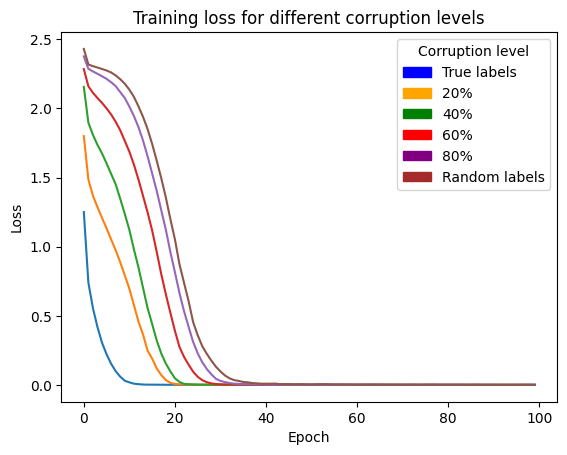

In [30]:
percentages = [0,20,40,60,80,100]
per_0_patch = mpatches.Patch(color='blue', label='True labels', linestyle='solid')
per_20_patch = mpatches.Patch(color='orange', label='20%')
per_40_patch = mpatches.Patch(color='green', label='40%')
per_60_patch = mpatches.Patch(color='red', label='60%')
per_80_patch = mpatches.Patch(color='purple', label='80%')
per_100_patch = mpatches.Patch(color='brown', label='Random labels')
for per in percentages:
    sns.lineplot(data=df_train_losses, x='Epoch', y=per)
    plt.legend(handles=[per_0_patch, per_20_patch, per_40_patch, per_60_patch, per_80_patch, per_100_patch],
                loc='upper right', title='Corruption level')
    plt.ylabel('Loss')
    plt.title('Training loss for different corruption levels')